<h1>IS71068A Data Programming (2022)</h1>
<h2>Coursework 2</h2>

<h3>Mr Elliot Walker</h3>
<h3>PT MSc Data Science</h3>
<h3>ID: 3368 6408</h3>

<h2>Overview</h2>
<p>What is the project about?</p>

<h2>Problem Area</h2>
<p>Which topic does this report pertain to?</p>

<h2>Methods</h2>
<p>What methods are utilized in collection, preprocessing, and analysis of data. Also discuss modelling technique used for creating predictions.</p>

<h2>Definitions</h2>
<p>How is anti-Russian sentiment defined?</p>

<h2>Collection of Data 1</h2>
<p>Collect all articles relating to Russia in 2022.</p>

In [3]:
from bs4 import BeautifulSoup as bs
import requests
import regex as re

# ARCHIVE URLs, contain the first page of each archive.
_daily_mail_URL    = "daily_mail.co.uk/archive/2022-01-01"
_DAILY_MAIL_URL     = "dailymail.co.uk/home/sitemaparchive/day_20220101.html"

# SITE ADDRESSES - Article URLs should be appended onto these when web scraping their content.
_INDEPENDENT_ADDRESS    = "independent.co.uk/"
_DAILY_MAIL_ADDRESS     = "dailymail.co.uk/"

# Define an empty dictionary which will store all articles (URLs to)
# mentioning Russia for a given newspaper, and their publication dates.
_independent_articles   = {"URL" : [], "Date" : []}
_daily_mail_articles    = {"URL" : [], "Date" : []}

def query_soup(url, jar = None):
    # Stores additional information pertaining to a HTTP request
    # we would like to invoke for a webpage's HTML content.
    http_headers = {
        "update-insecure-requests" : "1"
    }

    # The Daily Mail and The Independent both incorporate dates into their URLs
    if(url.__contains__(_INDEPENDENT_ADDRESS) or url.__contains__(_DAILY_MAIL_ADDRESS)):
        # For URLs which use the yyyy-mm-dd format
        # Cycle through the 12 months in the year.
        january     = 1
        december    = 13
        for i in range(january, december):
            # Set number of days to scan based on month index.
            days_of_the_month = 0
            if(
                i == 1  or 
                i == 3  or 
                i == 5  or 
                i == 7  or 
                i == 8  or 
                i == 10 or 
                i == 12):
                days_of_the_month = 31
            elif(i == 2):
                days_of_the_month = 28
            elif(
                i == 4,
                i == 6,
                i == 9,
                i == 11
                ):
                days_of_the_month = 30
            print("Days set to %d" % days_of_the_month)
            
            # Cycle through days in the current month 'i' and update
            # the URL to incorporate the date.
            current_day = 0
            for j in range(1, days_of_the_month + 1):
                # If we are on the first day, don't iterate URL just yet.
                if(i < 10 and j > 1 and j < 10):
                    # Format the URL based on which website it is from.
                    # The Independent and The Daily Mail both share the same date
                    # format with the exception of delimiting dashes '-'.
                    if(url.__contains__(_INDEPENDENT_ADDRESS)):
                        url = url.replace("2022-0" + str(i) + "-0" + str(j-1),
                                          "2022-0" + str(i) + "-0" + str(j))
                    elif(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("20220" + str(i) + "0" + str(j-1),
                                          "20220" + str(i) + "0" + str(j))
                elif(i >= 10 and j > 1 and j < 10):
                    if(url.__contains__(_INDEPENDENT_ADDRESS)):
                        url = url.replace("2022-" + str(i) + "-0" + str(j-1),
                                          "2022-" + str(i) + "-0" + str(j))
                    elif(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("2022" + str(i) + "0" + str(j-1),
                                          "2022" + str(i) + "0" + str(j))
                # Once the count for days reaches double digits, we ammend the
                # '0' so that it becomes numeric.
                elif(i < 10 and j == 10):
                    if(url.__contains__(_INDEPENDENT_ADDRESS)):
                        url = url.replace("2022-0" + str(i) + "-0" + str(j-1),
                                          "2022-0" + str(i) + "-" + str(j))
                    elif(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("20220" + str(i) + "0" + str(j-1),
                                          "20220" + str(i) + "" + str(j))    
                elif(i >= 10 and j == 10):
                    if(url.__contains__(_INDEPENDENT_ADDRESS)):
                        url = url.replace("2022-" + str(i) + "-0" + str(j-1),
                                          "2022-" + str(i) + "-" + str(j))
                    elif(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("2022" + str(i) + "0" + str(j-1),
                                          "2022" + str(i) + "" + str(j))
                # Once the day exceeds 10, we use the new format to iterate.
                elif(i < 10 and j > 10):
                    if(url.__contains__(_INDEPENDENT_ADDRESS)):
                        url = url.replace("2022-0" + str(i) + "-" + str(j-1),
                                          "2022-0" + str(i) + "-" + str(j))
                    elif(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("20220" + str(i) + "" + str(j-1),
                                          "20220" + str(i) + "" + str(j))
                elif(i >= 10 and j > 10):
                    if(url.__contains__(_INDEPENDENT_ADDRESS)):
                        url = url.replace("2022-" + str(i) + "-" + str(j-1),
                                          "2022-" + str(i) + "-" + str(j))
                    elif(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("2022" + str(i) + "" + str(j-1),
                                          "2022" + str(i) + "" + str(j))
                
                current_day = j
                
                print("\nChecking articles for %s" % ("2022-" + str(i) + "-" + str(current_day)) + " @ " + url)   
                # Check for local cookie cache (jar)
                # This prevents us having to redownload the entire page content
                # every time this function is invoked.
                if jar:
                    webpage = requests.get(url, cookies = jar, headers = http_headers)
                else:
                    webpage = requests.get(url, headers = http_headers)
                    jar = requests.cookies.RequestsCookieJar()

                # Convert raw HTML into text strings.
                webpagedata = webpage.text
                soup = bs(webpagedata, "html.parser")
                
                # Find all occurances of an <a> tag.
                # These include 'href' attributes for article links.
                content = soup.find_all('a')
                for a in content:
                    # Cast soup content to a string.
                    # Check if the string contains any mentions of Russia.
                    if(str(a).__contains__("Russia")):
                        # Query the 'href' link associated with it.
                        print(a['href'])
                        # Append article to dictionary.
                        if(url.__contains__(_INDEPENDENT_ADDRESS)):
                            _independent_articles["URL"].append(_INDEPENDENT_ADDRESS + a['href'])
                            _independent_articles["Date"].append("2022-" + str(i) + "-" + str(current_day))
                        elif(url.__contains__(_DAILY_MAIL_ADDRESS)):
                            _daily_mail_articles["URL"].append(_DAILY_MAIL_ADDRESS + a['href'])
                            _daily_mail_articles["Date"].append("2022-" + str(i) + "-" + str(current_day))
                    
            # Iterate month in URL and reset day to 1.
            # current_day stores the last scanned day so the .replace()
            # function has a reference as to what to set the day to
            # on the next iteration for the month.
            if(current_day >= days_of_the_month):
                if(i < 9):
                    if(url.__contains__(_INDEPENDENT_ADDRESS)):
                        url = url.replace("2022-0" + str(i) + "-" + str(current_day),
                                          "2022-0" + str(i+1) + "-01")
                    elif(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("20220" + str(i) + "" + str(current_day),
                                          "20220" + str(i+1) + "01")    
                elif(i == 9):
                    if(url.__contains__(_INDEPENDENT_ADDRESS)):
                        url = url.replace("2022-0" + str(i) + "-" + str(current_day),
                                          "2022-" + str(i+1) + "-01")
                    elif(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("20220" + str(i) + "" + str(current_day),
                                          "2022" + str(i+1) + "01")
                elif(i >= 10):
                    if(url.__contains__(_INDEPENDENT_ADDRESS)):
                        url = url.replace("2022-" + str(i) + "-" + str(current_day),
                                          "2022-" + str(i+1) + "-01")
                    if(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("2022" + str(i) + "" + str(current_day),
                                          "2022" + str(i+1) + "01")

    

query_soup("https://" + _INDEPENDENT_URL)
query_soup("https://" + _DAILY_MAIL_URL)

Days set to 31

Checking articles for 2022-1-1 @ https://independent.co.uk/archive/2022-01-01
/news/world/americas/us-politics/russia-joe-biden-ukraine-vladimir-putin-kremlin-b1985194.html

Checking articles for 2022-1-2 @ https://independent.co.uk/archive/2022-01-02
/news/world/americas/us-politics/joe-biden-ukraine-vladimir-putin-white-house-wilmington-b1985640.html
/news/frankfurt-calgary-alberta-germany-cops-b1985442.html

Checking articles for 2022-1-3 @ https://independent.co.uk/archive/2022-01-03
/news/world/americas/us-politics/russia-china-joe-biden-trump-ukraine-b1985742.html
/news/serbia-aleksandar-vucic-balkans-croatia-belgrade-b1985894.html

Checking articles for 2022-1-4 @ https://independent.co.uk/archive/2022-01-04
/voices/russia-china-taiwan-putin-biden-b1986387.html
/climate-change/news/climate-crisis-polar-bear-arctic-alaska-russia-b1986521.html

Checking articles for 2022-1-5 @ https://independent.co.uk/archive/2022-01-05
/asia/central-asia/kazakhstan-protests-news-

<p>Organize data into DataFrames.</p>

In [4]:
print("Articles on Russia found (The Independent): %d" % len(_independent_articles["URL"]))
print("Articles on Russia found (The Daily Mail): %d" % len(_daily_mail_articles["URL"])) 

import pandas as pd
_independent_articles = pd.DataFrame.from_dict(_independent_articles)
_daily_mail_articles = pd.DataFrame.from_dict(_daily_mail_articles)



Articles on Russia found (The Independent): 7265
Articles on Russia found (The Daily Mail): 24902


<p>Create a barplot for each newspaper, comparing how many articles on Russia each produced in 2022.</p>

<BarContainer object of 2 artists>

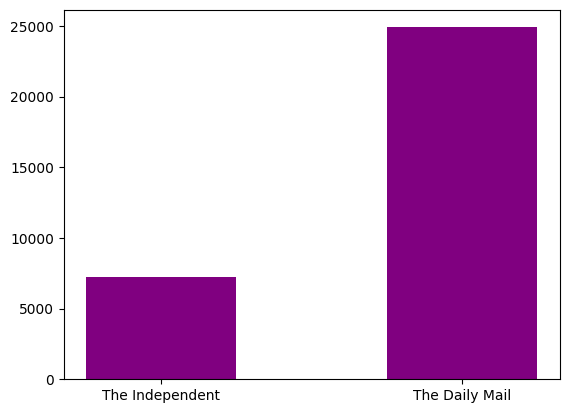

In [53]:
_number_of_independent_articles = len(_independent_articles["URL"])
_number_of_daily_mail_articles  = len(_daily_mail_articles["URL"])

_number_of_articles = {"The Independent" : _number_of_independent_articles, "The Daily Mail" : _number_of_daily_mail_articles}
_newspapers         = list(_number_of_articles.keys())
_count              = list(_number_of_articles.values())

import matplotlib.pyplot as plt
plt.bar(x = _newspapers, height = _count, color = "Purple", width = 0.5)

<p>Partition articles by month.</p>

In [48]:
_independent_articles_JANUARY   = {"URL" : [], "Date" : []}
_independent_articles_FEBRUARY  = {"URL" : [], "Date" : []}
_independent_articles_MARCH     = {"URL" : [], "Date" : []}
_independent_articles_APRIL     = {"URL" : [], "Date" : []}
_independent_articles_MAY       = {"URL" : [], "Date" : []}
_independent_articles_JUNE      = {"URL" : [], "Date" : []}
_independent_articles_JULY      = {"URL" : [], "Date" : []}
_independent_articles_AUGUST    = {"URL" : [], "Date" : []}
_independent_articles_SEPTEMBER = {"URL" : [], "Date" : []}
_independent_articles_OCTOBER   = {"URL" : [], "Date" : []}
_independent_articles_NOVEMBER  = {"URL" : [], "Date" : []}
_independent_articles_DECEMBER  = {"URL" : [], "Date" : []}

for article in _independent_articles.values:
    if(article[1].__contains__("2022-1")):
        _independent_articles_JANUARY["URL"].append(article[0])
        _independent_articles_JANUARY["Date"].append(article[1])
    if(article[1].__contains__("2022-2")):
        _independent_articles_FEBRUARY["URL"].append(article[0])
        _independent_articles_FEBRUARY["Date"].append(article[1])
    if(article[1].__contains__("2022-3")):
        _independent_articles_MARCH["URL"].append(article[0])
        _independent_articles_MARCH["Date"].append(article[1])
    if(article[1].__contains__("2022-4")):
        _independent_articles_APRIL["URL"].append(article[0])
        _independent_articles_APRIL["Date"].append(article[1])
    if(article[1].__contains__("2022-5")):
        _independent_articles_MAY["URL"].append(article[0])
        _independent_articles_MAY["Date"].append(article[1])
    if(article[1].__contains__("2022-6")):
        _independent_articles_JUNE["URL"].append(article[0])
        _independent_articles_JUNE["Date"].append(article[1])
    if(article[1].__contains__("2022-7")):
        _independent_articles_JULY["URL"].append(article[0])
        _independent_articles_JULY["Date"].append(article[1])
    if(article[1].__contains__("2022-8")):
        _independent_articles_AUGUST["URL"].append(article[0])
        _independent_articles_AUGUST["Date"].append(article[1])
    if(article[1].__contains__("2022-9")):
        _independent_articles_SEPTEMBER["URL"].append(article[0])
        _independent_articles_SEPTEMBER["Date"].append(article[1])
    if(article[1].__contains__("2022-10")):
        _independent_articles_OCTOBER["URL"].append(article[0])
        _independent_articles_OCTOBER["Date"].append(article[1])
    if(article[1].__contains__("2022-11")):
        _independent_articles_NOVEMBER["URL"].append(article[0])
        _independent_articles_NOVEMBER["Date"].append(article[1])
    if(article[1].__contains__("2022-12")):
        _independent_articles_DECEMBER["URL"].append(article[0])
        _independent_articles_DECEMBER["Date"].append(article[1])
        

print("Articles from JANUARY: %d"   % len(_independent_articles_JANUARY["URL"]))
print("Articles from FEBRUARY: %d"  % len(_independent_articles_FEBRUARY["URL"]))   
print("Articles from MARCH: %d"     % len(_independent_articles_MARCH["URL"]))   
print("Articles from APRIL: %d"     % len(_independent_articles_APRIL["URL"]))   
print("Articles from MAY: %d"       % len(_independent_articles_MAY["URL"]))   
print("Articles from JUNE: %d"      % len(_independent_articles_JUNE["URL"]))   
print("Articles from JULY: %d"      % len(_independent_articles_JULY["URL"]))   
print("Articles from AUGUST: %d"    % len(_independent_articles_AUGUST["URL"]))   
print("Articles from SEPTEMBER: %d" % len(_independent_articles_SEPTEMBER["URL"]))   
print("Articles from OCTOBER: %d"   % len(_independent_articles_OCTOBER["URL"]))   
print("Articles from NOVEMBER: %d"  % len(_independent_articles_NOVEMBER["URL"]))   
print("Articles from DECEMBER: %d"  % len(_independent_articles_DECEMBER["URL"]))

_independent_articles_by_month = {
    "Month" : [
        "January", 
        "February", 
        "March", 
        "April", 
        "May", 
        "June", 
        "July", 
        "August", 
        "September", 
        "October", 
        "November", 
        "December"
        ], 
    "Quantity" : [
        len(_independent_articles_JANUARY["URL"]), 
        len(_independent_articles_FEBRUARY["URL"]),
        len(_independent_articles_MARCH["URL"]),
        len(_independent_articles_APRIL["URL"]),
        len(_independent_articles_MAY["URL"]), 
        len(_independent_articles_JUNE["URL"]),
        len(_independent_articles_JULY["URL"]),
        len(_independent_articles_AUGUST["URL"]),
        len(_independent_articles_SEPTEMBER["URL"]), 
        len(_independent_articles_OCTOBER["URL"]),
        len(_independent_articles_NOVEMBER["URL"]),
        len(_independent_articles_DECEMBER["URL"])
        ]}



Articles from JANUARY: 1299
Articles from FEBRUARY: 1247
Articles from MARCH: 2105
Articles from APRIL: 743
Articles from MAY: 488
Articles from JUNE: 380
Articles from JULY: 330
Articles from AUGUST: 266
Articles from SEPTEMBER: 407
Articles from OCTOBER: 432
Articles from NOVEMBER: 337
Articles from DECEMBER: 246


<p>...and now for The Daily Mail...</p>

In [49]:
_daily_mail_articles_JANUARY   = {"URL" : [], "Date" : []}
_daily_mail_articles_FEBRUARY  = {"URL" : [], "Date" : []}
_daily_mail_articles_MARCH     = {"URL" : [], "Date" : []}
_daily_mail_articles_APRIL     = {"URL" : [], "Date" : []}
_daily_mail_articles_MAY       = {"URL" : [], "Date" : []}
_daily_mail_articles_JUNE      = {"URL" : [], "Date" : []}
_daily_mail_articles_JULY      = {"URL" : [], "Date" : []}
_daily_mail_articles_AUGUST    = {"URL" : [], "Date" : []}
_daily_mail_articles_SEPTEMBER = {"URL" : [], "Date" : []}
_daily_mail_articles_OCTOBER   = {"URL" : [], "Date" : []}
_daily_mail_articles_NOVEMBER  = {"URL" : [], "Date" : []}
_daily_mail_articles_DECEMBER  = {"URL" : [], "Date" : []}

for article in _daily_mail_articles.values:
    if(article[1].__contains__("2022-1")):
        _daily_mail_articles_JANUARY["URL"].append(article[0])
        _daily_mail_articles_JANUARY["Date"].append(article[1])
    if(article[1].__contains__("2022-2")):
        _daily_mail_articles_FEBRUARY["URL"].append(article[0])
        _daily_mail_articles_FEBRUARY["Date"].append(article[1])
    if(article[1].__contains__("2022-3")):
        _daily_mail_articles_MARCH["URL"].append(article[0])
        _daily_mail_articles_MARCH["Date"].append(article[1])
    if(article[1].__contains__("2022-4")):
        _daily_mail_articles_APRIL["URL"].append(article[0])
        _daily_mail_articles_APRIL["Date"].append(article[1])
    if(article[1].__contains__("2022-5")):
        _daily_mail_articles_MAY["URL"].append(article[0])
        _daily_mail_articles_MAY["Date"].append(article[1])
    if(article[1].__contains__("2022-6")):
        _daily_mail_articles_JUNE["URL"].append(article[0])
        _daily_mail_articles_JUNE["Date"].append(article[1])
    if(article[1].__contains__("2022-7")):
        _daily_mail_articles_JULY["URL"].append(article[0])
        _daily_mail_articles_JULY["Date"].append(article[1])
    if(article[1].__contains__("2022-8")):
        _daily_mail_articles_AUGUST["URL"].append(article[0])
        _daily_mail_articles_AUGUST["Date"].append(article[1])
    if(article[1].__contains__("2022-9")):
        _daily_mail_articles_SEPTEMBER["URL"].append(article[0])
        _daily_mail_articles_SEPTEMBER["Date"].append(article[1])
    if(article[1].__contains__("2022-10")):
        _daily_mail_articles_OCTOBER["URL"].append(article[0])
        _daily_mail_articles_OCTOBER["Date"].append(article[1])
    if(article[1].__contains__("2022-11")):
        _daily_mail_articles_NOVEMBER["URL"].append(article[0])
        _daily_mail_articles_NOVEMBER["Date"].append(article[1])
    if(article[1].__contains__("2022-12")):
        _daily_mail_articles_DECEMBER["URL"].append(article[0])
        _daily_mail_articles_DECEMBER["Date"].append(article[1])
        

print("Articles from JANUARY: %d"   % len(_daily_mail_articles_JANUARY["URL"]))
print("Articles from FEBRUARY: %d"  % len(_daily_mail_articles_FEBRUARY["URL"]))   
print("Articles from MARCH: %d"     % len(_daily_mail_articles_MARCH["URL"]))   
print("Articles from APRIL: %d"     % len(_daily_mail_articles_APRIL["URL"]))   
print("Articles from MAY: %d"       % len(_daily_mail_articles_MAY["URL"]))   
print("Articles from JUNE: %d"      % len(_daily_mail_articles_JUNE["URL"]))   
print("Articles from JULY: %d"      % len(_daily_mail_articles_JULY["URL"]))   
print("Articles from AUGUST: %d"    % len(_daily_mail_articles_AUGUST["URL"]))   
print("Articles from SEPTEMBER: %d" % len(_daily_mail_articles_SEPTEMBER["URL"]))   
print("Articles from OCTOBER: %d"   % len(_daily_mail_articles_OCTOBER["URL"]))   
print("Articles from NOVEMBER: %d"  % len(_daily_mail_articles_NOVEMBER["URL"]))   
print("Articles from DECEMBER: %d"  % len(_daily_mail_articles_DECEMBER["URL"]))

_daily_mail_articles_by_month = {
    "Month" : [
        "January", 
        "February", 
        "March", 
        "April", 
        "May", 
        "June", 
        "July", 
        "August", 
        "September", 
        "October", 
        "November", 
        "December"
        ], 
    "Quantity" : [
        len(_daily_mail_articles_JANUARY["URL"]), 
        len(_daily_mail_articles_FEBRUARY["URL"]),
        len(_daily_mail_articles_MARCH["URL"]),
        len(_daily_mail_articles_APRIL["URL"]),
        len(_daily_mail_articles_MAY["URL"]), 
        len(_daily_mail_articles_JUNE["URL"]),
        len(_daily_mail_articles_JULY["URL"]),
        len(_daily_mail_articles_AUGUST["URL"]),
        len(_daily_mail_articles_SEPTEMBER["URL"]), 
        len(_daily_mail_articles_OCTOBER["URL"]),
        len(_daily_mail_articles_NOVEMBER["URL"]),
        len(_daily_mail_articles_DECEMBER["URL"])
        ]}


Articles from JANUARY: 4910
Articles from FEBRUARY: 3443
Articles from MARCH: 5799
Articles from APRIL: 2752
Articles from MAY: 2016
Articles from JUNE: 1635
Articles from JULY: 1491
Articles from AUGUST: 1206
Articles from SEPTEMBER: 1650
Articles from OCTOBER: 1535
Articles from NOVEMBER: 1281
Articles from DECEMBER: 1054


<p>Line plots of each newspaper's production of Russia-related articles throughout 2022.</p>

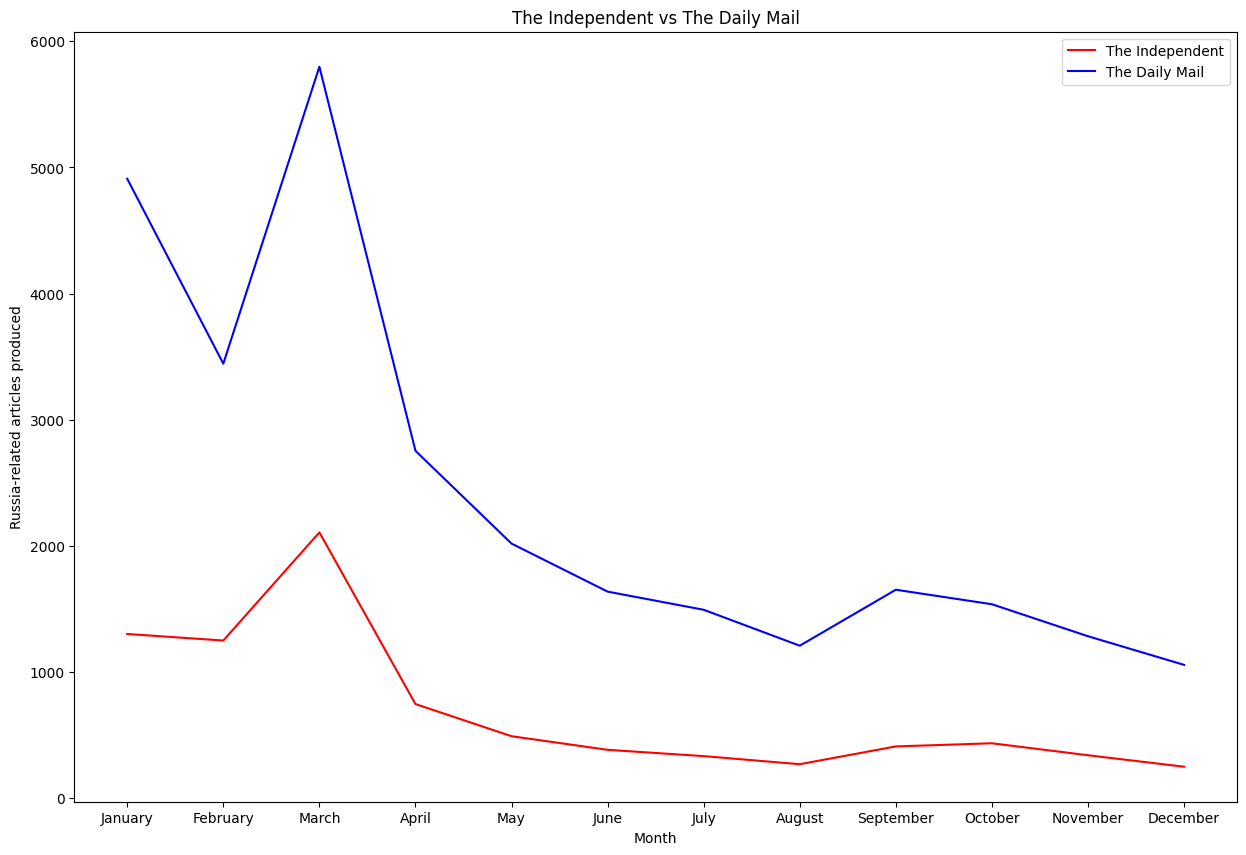

In [55]:
plt.figure(figsize = (15,10))
plt.xlabel("Month")
plt.ylabel("Russia-related articles produced")
plt.title("The Independent vs The Daily Mail")
plt.plot(_independent_articles_by_month["Month"], _independent_articles_by_month["Quantity"], label = "The Independent", color = "Red")
plt.plot(_daily_mail_articles_by_month["Month"], _daily_mail_articles_by_month["Quantity"], label = "The Daily Mail", color = "Blue")
plt.legend()

plt.show()

<h2>Preprocessing 1</h2>
<p>Conduct encoding and tidying on accumulated data.</p>

<h2>Analysis 1</h2>
<p>Conduct EDA on accumulated data.</p>

<h2>Modelling 1</h2>
<p>Create a statistical model to express the relationship between the number of articles posted by a newspaper against time.</p>

<h2>Predictions 1</h2>
<p>Use the model to predict how many articles will be produced on Russia in the future.</p>

<h2>Collection of Data 2</h2>
<p>Utilizing the URLs to the articles we scraped in part 1, we can now scrape each one individually for its text data.</p>
<p>Investigate occurances of anti-Russian sentiment in newspapers based on the definition above.</p>

<h2>Preprocessing 2</h2>
<p>Clean text data from articles. Encode detected sentiment into discrete values.</p>

<h2>Analysis 2</h2>
<p>Determine the probability distributions for sentiments across both newspapers. Also try plotting the sentiment over time.</p>
<p>Cross reference sentiment with European Gas Prices as per the TTF (see first CW).</p>

<h2>Modelling 2</h2>
<p>Create a second model which describes the relationship between sentiment and time.</p>

<h2>Predictions 2</h2>
<p>Using this second model, predict the sentiment on Russia in the future.</p>

<h2>Discussion</h2>

<h2>Summary</h2>

<h2>References</h2>